In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting the file data
df = pd.read_csv(r"C:\Users\tania\Desktop\clothsize.csv")
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  450 non-null    int64  
 1   age     449 non-null    float64
 2   height  450 non-null    float64
 3   size    450 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 14.2+ KB


In [4]:
#searching for null values if any
df.isna().sum()

weight    0
age       1
height    0
size      0
dtype: int64

In [5]:
#dropping the rows with null values
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 449
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  449 non-null    int64  
 1   age     449 non-null    float64
 2   height  449 non-null    float64
 3   size    449 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 17.5+ KB


In [7]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [8]:
df['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL'], dtype=object)

<AxesSubplot:xlabel='weight', ylabel='age'>

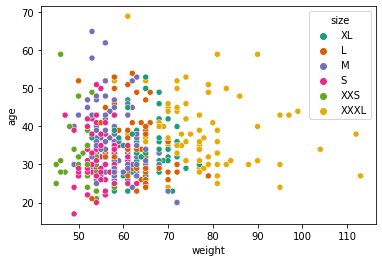

In [35]:
# Visualization
sns.scatterplot(x='weight',y='age',data=df,hue='size',palette='Dark2')

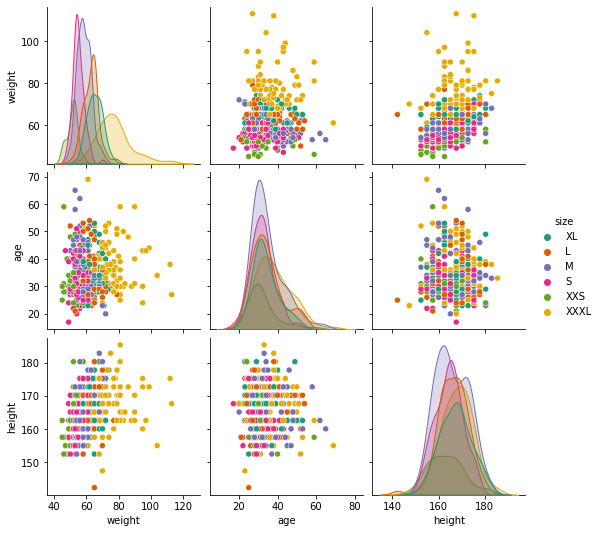

In [10]:
sns.pairplot(df,hue='size',palette='Dark2')

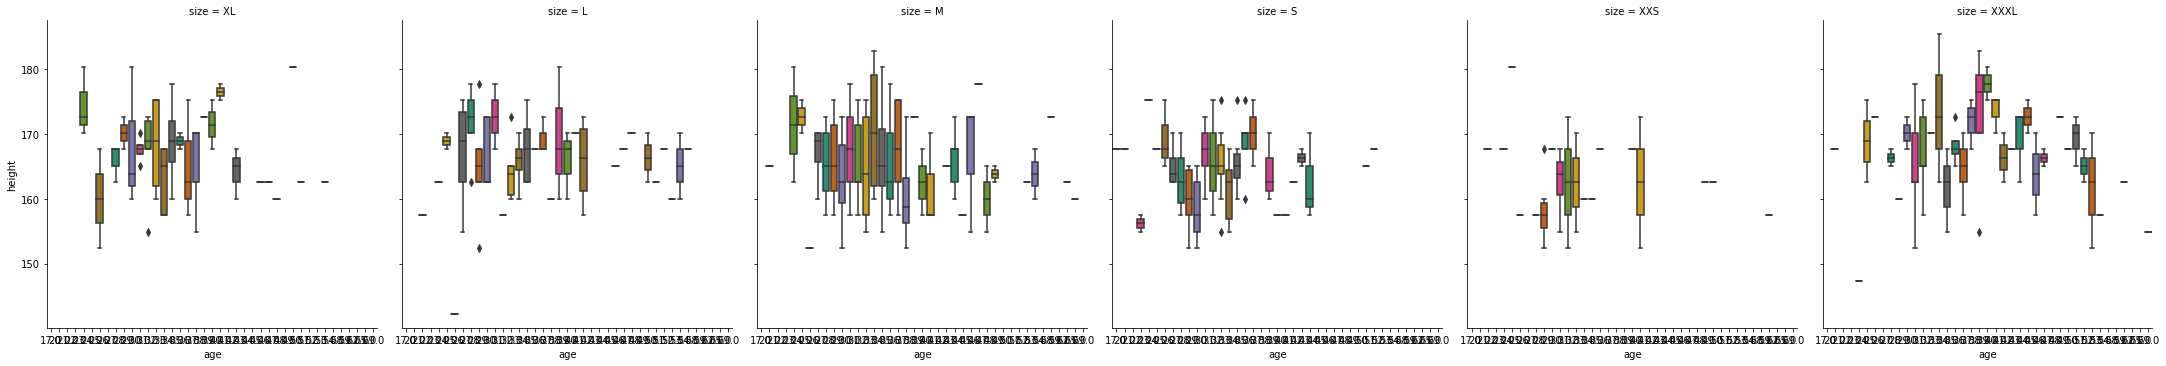

In [13]:
sns.catplot(x='age',y='height',data=df,kind='box',col='size',palette='Dark2')

In [14]:
#Feature engineering
pd.get_dummies(df)

,weight,age,height,size_L,size_M,size_S,size_XL,size_XXS,size_XXXL
0,62,28.0,172.72,0,0,0,1,0,0
1,59,36.0,167.64,1,0,0,0,0,0
2,61,34.0,165.10,0,1,0,0,0,0
3,65,27.0,175.26,1,0,0,0,0,0
4,62,45.0,172.72,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
445,58,39.0,167.64,0,0,0,1,0,0
446,68,34.0,167.64,0,0,0,1,0,0
447,70,28.0,177.80,1,0,0,0,0,0
448,70,37.0,167.64,0,0,0,0,0,1


In [15]:
pd.get_dummies(df.drop('size',axis=1),drop_first=True)

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72
...,...,...,...
445,58,39.0,167.64
446,68,34.0,167.64
447,70,28.0,177.80
448,70,37.0,167.64


In [16]:
#train, test and split
X = pd.get_dummies(df.drop('size',axis=1),drop_first=True)
y = df['size']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
base_pred = model.predict(X_test)

In [23]:
#Evaluation
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [24]:
confusion_matrix(y_test,base_pred)

array([[13,  4,  1,  2,  0,  1],
       [ 5, 10, 15,  8,  1,  1],
       [ 1,  5,  9,  1, 10,  0],
       [ 4,  4,  1,  4,  0,  6],
       [ 0,  1,  3,  0,  4,  0],
       [ 1,  0,  0,  2,  0, 18]], dtype=int64)

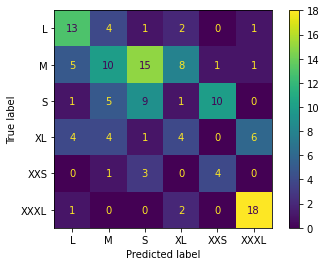

In [25]:
plot_confusion_matrix(model,X_test,y_test)

In [26]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           L       0.54      0.62      0.58        21
           M       0.42      0.25      0.31        40
           S       0.31      0.35      0.33        26
          XL       0.24      0.21      0.22        19
         XXS       0.27      0.50      0.35         8
        XXXL       0.69      0.86      0.77        21

    accuracy                           0.43       135
   macro avg       0.41      0.46      0.43       135
weighted avg       0.42      0.43      0.42       135



In [27]:
model.feature_importances_

array([0.3895324 , 0.35820818, 0.25225942])

In [28]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
weight,0.389532
age,0.358208
height,0.252259


<AxesSubplot:xlabel='size', ylabel='height'>

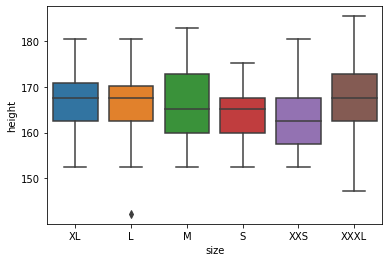

In [31]:
sns.boxplot(x='size',y='height',data=df)

In [32]:
#plotting the decision tree
from sklearn.tree import plot_tree

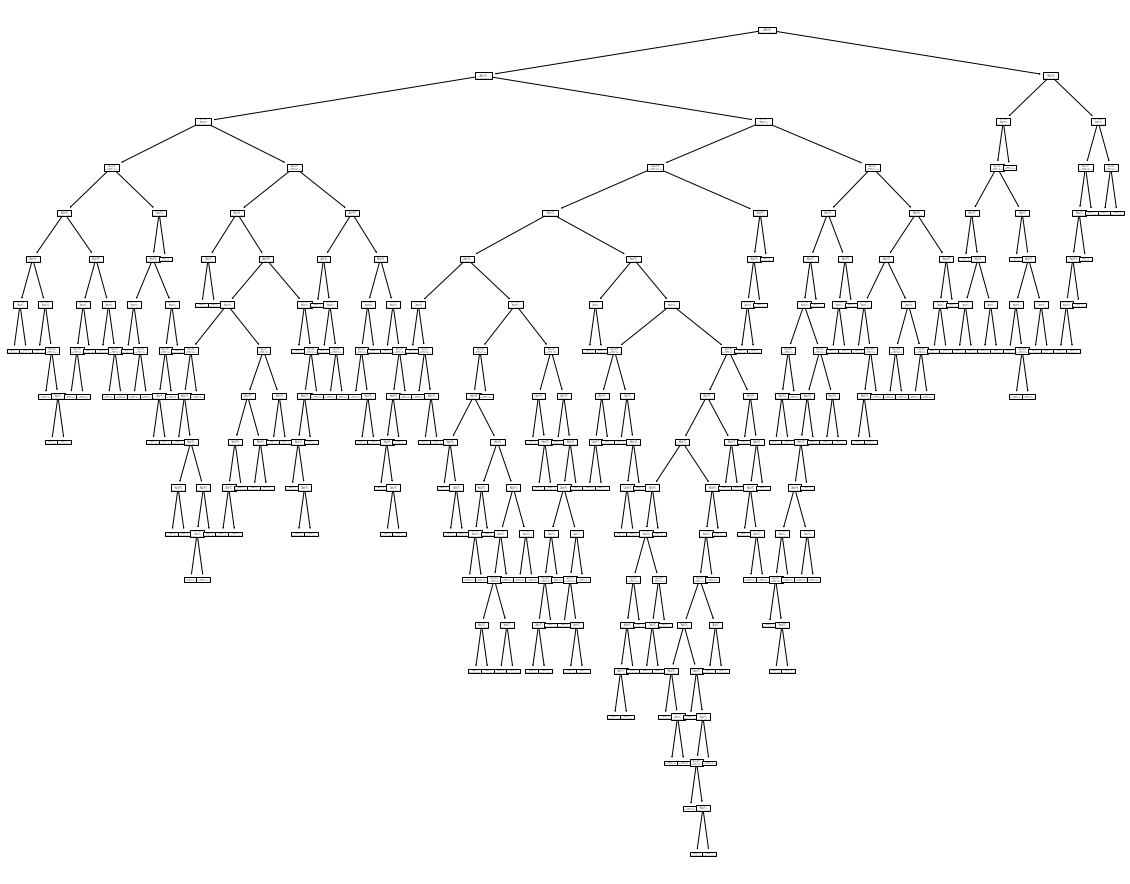

In [34]:
plt.figure(figsize=(20,16))
plot_tree(model);